<a href="https://colab.research.google.com/github/daisy-rivera/Sales-Predictions/blob/main/project1_part5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 1- Part 5


Daisy Rivera

The goal of this project is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

Link to original datasource [Here](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/)

###Data Dictionary

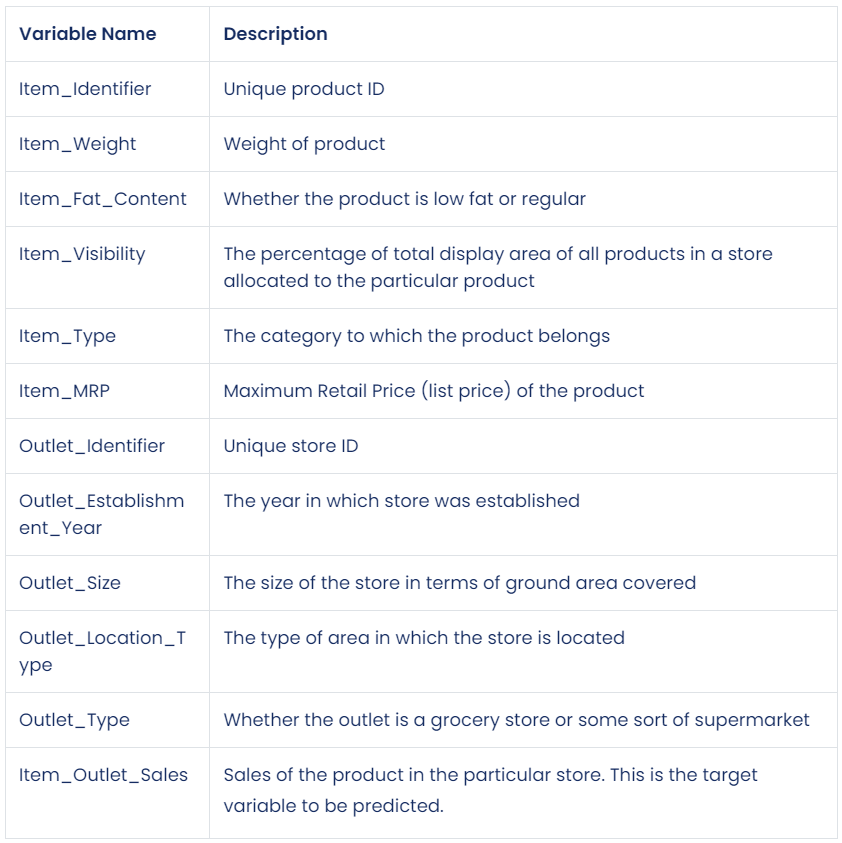

##Loading Data



In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filename = '/content/drive/MyDrive/Coding Dojo/Stack 2 - Machine Learning/05 Wk 5 Intro Machine Learning & Pre-Processing/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##EDA - Exploratory Data Analysis

In [4]:
#checking datatypes, how many total rows and seeing if any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
#Total Number of rows and columns

df.shape

(8523, 12)

##Checking for duplicates

In [6]:
#Checking for duplicate items

df.duplicated().sum()

0

##Checking for inconsistencies in categories and their counts

In [7]:
#Checking for inconsistent categories of data

df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [8]:
#Renaming all categories for consistency to Low Fat & Regular.
df.replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'}, inplace = True)

In [9]:
#Verifying that the categories were changed.
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [10]:
#Checking for inconsistent categories of data

df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [11]:
#Checking for inconsistent categories of data

df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [12]:
#Checking for inconsistent categories of data

df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [13]:
#Checking for inconsistent categories of data

df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [14]:
#checking incositent categories and count
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [15]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [16]:
#checking how many unique categories are there for Item Identifier
df['Item_Identifier'].describe()

count      8523
unique     1559
top       FDW13
freq         10
Name: Item_Identifier, dtype: object

Checking for any outliers or odd values in the data

In [17]:
#Summary statistics for the integer values.
df.describe().round(4)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.0000,8523.0000,8523.0000,8523.0000,8523.0000
mean,12.8576,0.0661,140.9928,1997.8319,2181.2889
std,4.6435,0.0516,62.2751,8.3718,1706.4996
min,4.5550,0.0000,31.2900,1985.0000,33.2900
25%,8.7738,0.0270,93.8265,1987.0000,834.2474
50%,12.6000,0.0539,143.0128,1999.0000,1794.3310
75%,16.8500,0.0946,185.6437,2004.0000,3101.2964
max,21.3500,0.3284,266.8884,2009.0000,13086.9648


##Types of Values

Numeric Values
- Item_Visibility
- Item_Weight
- Item_MRP
- Outlet_Establishment_Year

Ordinal Values
- Outlet_Location_Type (Tier1,Tier2,Tier3)

Nominal Values
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size (This is Small, Medium and High but I will be filling missing items with a new Unknown category)
- Outlet_Type 




##Preprocessing data for ML

Addressing Ordinal Values

In [18]:
#checking category counts prior to converting
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [20]:
#replacing category values
df['Outlet_Location_Type'].replace({'Tier 1':0, 'Tier 2':1, 'Tier 3':2}, inplace=True)

#confirming changes were made
df['Outlet_Location_Type'].value_counts()

2    3350
1    2785
0    2388
Name: Outlet_Location_Type, dtype: int64

Verifying Missing Values

In [22]:
#Identifying missing values

df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

* I will address the missing items in the 'Item_Weight' column with a Mean SimpleImputer after splitting my data. 
* For 'Outlet_Size' I decided to add an 'Unknown' category since the amount of missing data (2410) is very similar to the counts of other categories.

##Assigning Target and Feature Values and Splitting Data into Traing & Test datasets

In [25]:
#Assign values to X and y
y = df['Item_Outlet_Sales']
X = df.drop(columns = 'Item_Outlet_Sales')

In [26]:
#split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

##Creating Objects and Number Column lists

In [27]:
# Create column lists for objects and a number selector

cat_cols = make_column_selector(dtype_include='object')
num_cols = make_column_selector(dtype_include='number')

Instantiate Transformers

In [28]:
#instantiate the Transformers
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

mean_imputer = SimpleImputer(strategy='mean')
constant_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')

##Create Cat and Num Pipelines

In [29]:
# Setup the pipelines for the numeric and categorical data

num_pipe = make_pipeline(mean_imputer, scaler)
cat_pipe = make_pipeline(constant_imputer, ohe)

##Create Tuples to Pair Pipelines with Columns Selectors

In [30]:
num_tuple = (num_pipe, num_cols)
cat_tuple = (cat_pipe, cat_cols)

#Create Transformer

In [31]:
# Instantiate ColumnTransformer
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder='drop')

##Fit Column Transformer on Training Dataset

In [32]:
#fit the ColumnTransformer on the X_train only
preprocessor.fit(X_train)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f7de882b610>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f7de882b1f0>)])

##Apply Transformer to both Train and Test Datasets

In [33]:
# Transform the X_train and the X_test
X_train_proc = preprocessor.transform(X_train)
X_test_proc = preprocessor.transform(X_test)

##Checking Results after Transformers

In [34]:
#check for missing values
np.isnan(X_train_proc).sum()

0

In [35]:
# Check the resulting shape for Training dataset
X_train_proc.shape

(6392, 1591)

In [36]:
# Check the resulting shape for Teesting dataset
X_test_proc.shape

(2131, 1591)